In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import rawdata
import inputstate
import coincidencecheck

# Extra functions

In [2]:
def plot_time_window(rho, input_rho, fidelity, success_rate, window_list, voltages):
    # Fidelity
    plt.figure()
    for v in voltages:
        plt.scatter(window_list, fidelity[v], label = 'Data '+ v)
        plt.legend()
        plt.title('Fidelity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity')
    plt.show()

    # Success rate
    plt.figure()
    for v in voltages:
        plt.scatter(window_list, 100*success_rate[v], label = 'Data '+ v)
        plt.legend()
        plt.title('Success rate vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Success_rate (%)')
    plt.show()

    # Fidelity times success rate
    fid_success = {v: fidelity[v]*success_rate[v] for v in voltages}
    plt.figure()
    for v in voltages:
        plt.scatter(window_list, fid_success[v], label = 'Data '+ v)
        plt.legend()
        plt.title('Fidelity * success rate vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity * success rate')
    plt.show()

    # Purity
    purity = {v: np.zeros((len(window_list)), dtype = complex) for v in voltages}
    for v in voltages:
        for t in range(len(window_list)):
            purity[v][t] = np.abs(np.trace(rho[v][t]@rho[v][t]))
    plt.figure()
    for v in voltages:
        plt.scatter(window_list, purity[v], label = 'Data '+ v)
        plt.legend()
        plt.title('Purity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Purity of output state')
    plt.show()

    input_alpha = [np.abs(np.trace(a_operator(n_dim)@input_rho[v])) for v in voltages]
    fid_success_array = np.zeros((len(voltages), len(window_list)), dtype = complex)
    for n, v in enumerate(voltages):
        fid_success_array[n][:] = fid_success[v][:]

    # Fidelity times success rate across each data
    plt.figure()
    for n, t in enumerate(window_list):
        plt.scatter(input_alpha, fid_success_array[:,n], label = f"Time delay {t:.2g}")
        plt.legend(loc = 'center right', bbox_to_anchor = (1.4,.5))
        plt.title('Fidelity * success rate')
        plt.xlabel('Input alpha')
        plt.ylabel('Fidelity * success rate')
    plt.grid()
    plt.show()

# Import data

Data imported
Clearance at 10.0 MHz is 15.74 dB
6 files for each phase
10000 sequences on each file with 252 data points each
Data imported
Clearance at 10.0 MHz is 15.75 dB
6 files for each phase
10000 sequences on each file with 252 data points each
Data imported
Clearance at 10.0 MHz is 14.92 dB
5 files for each phase
10000 sequences on each file with 252 data points each


"\n# Time information\nsequences = meta['subarray_count']\n#files_for_each_phase = int(len(homodyne['000'])/sequences)\n#total_sequences = files_for_each_phase*sequences\ntotal_points = meta['wave_array_count']\npoints_per_seq = int(meta['wave_array_count']/sequences)\nTs = meta['horiz_interval']\nbegin = meta['horiz_offset']\nx = np.linspace(begin, begin + Ts*total_points, total_points)\nx_sequence = np.linspace(begin, begin + Ts*points_per_seq, points_per_seq)\n#print('%d files for each phase' %files_for_each_phase)\n#print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))\n"

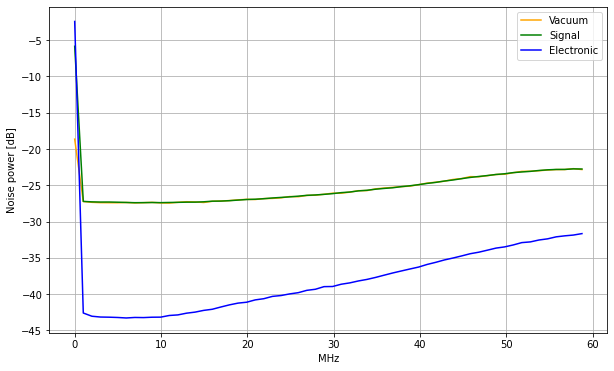

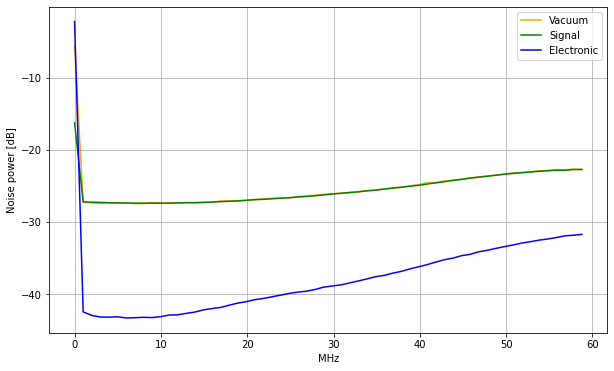

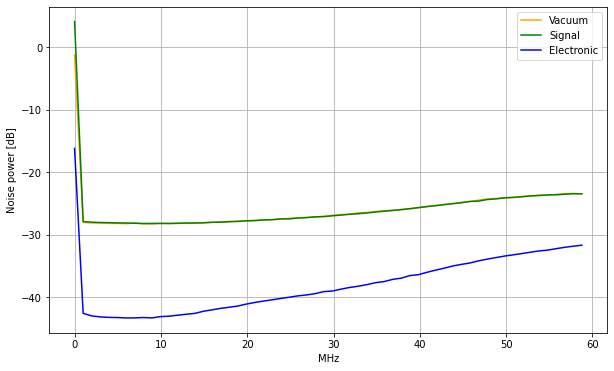

In [3]:
# Tomography information
tomography_phases = ['000', '030', '060', '090', '120', '150']
n_dim = 15 # Dimension for analysis

# Folder with data
'''
folder = "C:/Users/qpitlab/Desktop/Scissor QKD data/teleportation/"
date = "20240213/"
data = ''
extra = 'size0-phase0/'
path = folder + date + data + extra
homodyne, heralding, charlie, vacuum, meta = import_data(path)
'''
# Import multiple data
voltages = ['vac', '001', '002']
folder = "C:/Users/qpitlab/Desktop/Scissor QKD data/teleportation/"
date = {'vac': '20240213/', '001': '20240213/', '002': '20240209/'}
extra = {'vac': 'size0-phase0/', '001': 'voltage001-phase090/', '002': 'voltage002-phase090/'}
path = {v: folder + date[v] + extra[v] for v in voltages}
data = {v: None for v in voltages}
homodyne = {v: None for v in voltages}
heralding = {v: None for v in voltages}
charlie = {v: None for v in voltages}
vacuum = {v: None for v in voltages}
files_for_each_phase = {v: None for v in voltages}
total_sequences = {v: None for v in voltages}
for v in voltages:
    data[v] = rawdata.rawdata(path[v], n_dim)
    homodyne[v] = data[v].homodyne
    charlie[v] = data[v].charlie
    vacuum[v] = data[v].vacuum
    sequences = data[voltages[0]].sequences
    points_per_seq = data[voltages[0]].points_per_seq
    files_for_each_phase[v] = data[v].files_for_each_phase
    total_sequences[v] = files_for_each_phase[v]*sequences
    print('%d files for each phase' %files_for_each_phase[v])
    print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))
'''
# Time information
sequences = meta['subarray_count']
#files_for_each_phase = int(len(homodyne['000'])/sequences)
#total_sequences = files_for_each_phase*sequences
total_points = meta['wave_array_count']
points_per_seq = int(meta['wave_array_count']/sequences)
Ts = meta['horiz_interval']
begin = meta['horiz_offset']
x = np.linspace(begin, begin + Ts*total_points, total_points)
x_sequence = np.linspace(begin, begin + Ts*points_per_seq, points_per_seq)
#print('%d files for each phase' %files_for_each_phase)
#print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))
'''

# Apply mode function and analyse input state

No handles with labels found to put in legend.


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


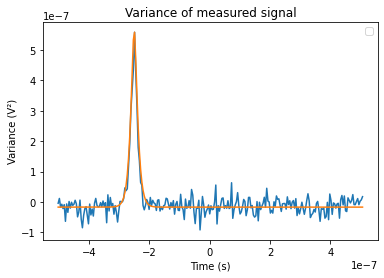

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


No handles with labels found to put in legend.


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


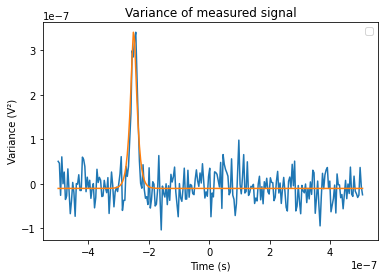

CALCULATING INPUT STATE PARAMETERS
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


No handles with labels found to put in legend.


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


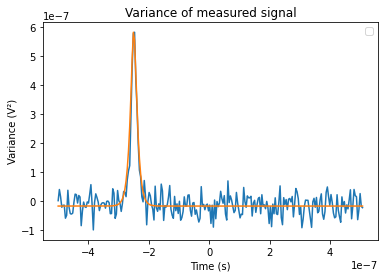

CALCULATING INPUT STATE PARAMETERS
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE


In [6]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Apply temporal mode function to multilple data
mf_homodyne = {v: None for v in voltages}
mf_vacuum = {v: None for v in voltages}
input_rho = {v: None for v in voltages}
input_data = {v: None for v in voltages}

for v in voltages:
    mf_homodyne[v], mf_vacuum[v] = data[v].apply_mode_function(homodyne[v], vacuum[v])
    input_data[v] = inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False)

In [7]:
data['vac'].mf

array([3.96696601e-04, 6.09190218e-04, 9.35507694e-04, 1.43661966e-03,
       2.20615615e-03, 3.38790084e-03, 5.20265625e-03, 7.98949950e-03,
       1.22691370e-02, 1.88411955e-02, 2.89336282e-02, 4.44321508e-02,
       6.82325771e-02, 1.04781886e-01, 1.60909115e-01, 2.47101327e-01,
       3.79463060e-01, 5.82725369e-01, 8.94866682e-01, 1.37420885e+00,
       2.11031422e+00, 3.24071984e+00, 4.97663535e+00, 7.64240607e+00,
       1.17361146e+01, 1.80226433e+01, 2.76765862e+01, 4.25017091e+01,
       6.52679613e+01, 1.00228999e+02, 1.53916903e+02, 2.36362539e+02,
       3.62969520e+02, 5.57391741e+02, 8.55951824e+02, 1.31442533e+03,
       2.01845687e+03, 3.09955109e+03, 4.75961972e+03, 7.30865667e+03,
       1.12225501e+04, 1.72317678e+04, 2.64573474e+04, 4.06193032e+04,
       6.23557575e+04, 9.57110748e+04, 1.46881329e+05, 2.25350265e+05,
       3.45614926e+05, 5.29795532e+05, 8.11557850e+05, 1.24195435e+06,
       1.89800567e+06, 2.89505036e+06, 4.40394404e+06, 6.67370661e+06,
      

# Check for coincidences

In [4]:
# SSPD time delay information
sspd_time_delay = 100e-9
window = 2e-9
window_list = np.linspace(1e-9, 10e-9, 10)

# Obtain data and success rate for a single data and a single time window
#sig, success_rate = teleported_state_with_optimal_success_rate(homodyne, charlie, sspd_time_delay, window)
#sig, success_rate = select_teleported_data(homodyne, charlie, sspd_time_delay - 5e-9, window)

# Obtain data and success rate for a single data and multiple time windows
#vectorize_select = np.vectorize(select_teleported_data)
#sig, success_rate = vectorize_select(homodyne, charlie, sspd_time_delay - 5e-9, window_list)

# Obtain data and success rate for multiple data and multiple time windows
coincidence = {v: [coincidencecheck.selectdata(mf_homodyne[v], charlie[v], data[v].meta, w, verbose = False) for w in window_list] for v in voltages}
sig = {v: [None for w in window_list] for v in voltages}
success_rate = {v: [None for w in window_list] for v in voltages}
for v in voltages:
    for w in range(len(window_list)):
        sig[v][w], success_rate[v][w] = coincidence[v][w].select_teleported_data()

Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.35 %
Success rate = 0.44 %
Success rate = 0.44 %
Success rate = 0.44 %
Success rate = 0.52 %
Success rate = 0.58 %
Success rate = 0.58 %
Success rate = 0.30 %
Success rate = 0.30 %
Success rate = 0.30 %
Success rate = 0.43 %
Success rate = 0.55 %
Success rate = 0.55 %
Success rate = 0.55 %
Success rate = 0.65 %
Success rate = 0.73 %
Success rate = 0.73 %
Success rate = 0.37 %
Success rate = 0.37 %
Success rate = 0.37 %
Success rate = 0.54 %
Success rate = 0.70 %
Success rate = 0.70 %
Success rate = 0.70 %
Success rate = 0.84 %
Success rate = 0.98 %
Success rate = 0.98 %


# Calculate output state

In [ ]:
# Calculate output state for single data and multiple time delays
# runs = len(window_list)
# rho = np.zeros((runs, n_dim+1, n_dim+1), dtype = complex)
# fidelity = np.zeros(runs)
# for i in range(runs):
#     rho[i], fidelity[i] = calculate_output_state(sig[i], input_rho, success_rate[i], n_dim, plot = False, verbose = False)

# Calculate output state for multiple data and multiple time delays
runs = len(window_list)
rho = {v: np.zeros((runs, n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity = {v: np.zeros(runs) for v in voltages}
for v in voltages:
    for i in range(runs):
        rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v].input_rho, success_rate[v][i], n_dim, plot = False, verbose = False)

# Calculate fidelity with output state
#fidelity = quantumStateFidelity(rho, input_rho)
#print("Output fidelity is %f" %fidelity)
#print("Success rate is %f" %np.mean(success_rate))
#print("The product of these values is %f" %(fidelity*np.mean(success_rate)))
#print("Purity of output state is %.2f" %np.trace(rho@rho))

Converged
50 runs
|alpha| = 0.01
theta = 30.50°


C:\Users\qpitlab\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
131 runs
|alpha| = 0.01
theta = -54.43°
Converged
163 runs
|alpha| = 0.01
theta = 83.90°
Converged
163 runs
|alpha| = 0.01
theta = 83.90°
Converged
163 runs
|alpha| = 0.01
theta = 83.90°
Converged
128 runs
|alpha| = 0.01
theta = -70.63°
Converged
124 runs
|alpha| = 0.01
theta = -38.06°
Converged
124 runs
|alpha| = 0.01
theta = -38.06°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°


In [ ]:
plot_time_window(rho, input_data.input_rho, fidelity, success_rate, window_list, voltages)